## CAR PRICE PREDICTION

With the covid 19 impact in the market, we have seen lot of changes in the car market. Now some 
cars are in demand hence making them costly and some are not in demand hence cheaper. One 
of our clients works with small traders, who sell used cars. With the change in market due to covid 
19 impact, our client is facing problems with their previous car price valuation machine learning 
models. So, they are looking for new machine learning models from new data. We have to make 
car price valuation model. This project contains two phase

In phase-1 we have to scrap data from website like car dekho which is already done.
so lets move to phase-2 which is model building.

### Model Building Phase

### importing liberaries

In [2]:
#data lib
import pandas as pd
import numpy as np

#visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV,train_test_split

#models-Since it is regression problem so we will import regression algorithm lib
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor


#metrics
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error


#model save
import pickle
import warnings
warnings.filterwarnings('ignore')

In [3]:
#loading dataset

data=pd.read_csv(r'C:\Users\91995\Downloads\CAR DETAILS FROM CAR DEKHO.csv')

In [4]:
data

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


### EDA

As we can see in name feature we have car company name & variant so we can seperate it.

In [7]:
data['Brand']=data['name'].apply(lambda x:x.split(' ')[0])

In [13]:
data['variant']=data['name'].apply(lambda x:x.split(' ',1)[1])

In [17]:
#feature name has splitted into new feature so now we can remove orignal feature

del data['name']

#### Data overview

In [19]:
data.shape

(4340, 9)

we have total 4340 observations and 8 features to predict target i.e. selling price.

#### Duplicacy Test

In [21]:
data.duplicated().sum()

763

In [23]:
#we found 763 duplicate observations in data set so we can remove these duplicacy.

data.drop_duplicates(inplace=True)

In [24]:
data.nunique()

year               27
selling_price     445
km_driven         770
fuel                5
seller_type         3
transmission        2
owner               5
Brand              29
variant          1491
dtype: int64

### Distplot

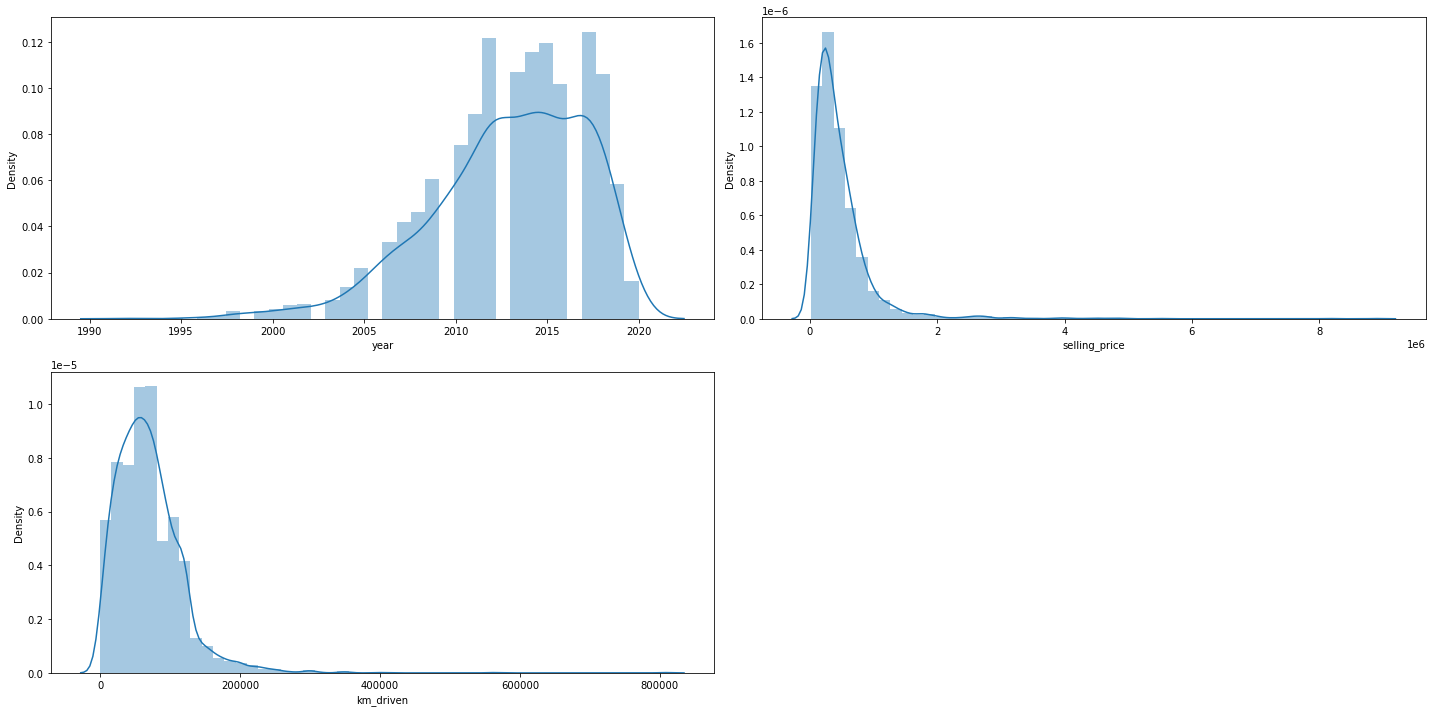

In [33]:
plt.figure(figsize=(20,10))

plotnumber=1

for col in data:
    if plotnumber<=3:
        ax=plt.subplot(2,2,plotnumber)
        sns.distplot(data[col])
    plotnumber+=1
        
plt.tight_layout()

Feature year data seems normal.
But selling price and km driven clearly shown some outliers. so need to remove these outliers.

#### Null Data

In [34]:
data.isna().sum()

year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
Brand            0
variant          0
dtype: int64

In [35]:
data.describe()

,year,selling_price,km_driven
count,3577.000000,3.577000e+03,3577.000000
mean,2012.962538,4.739125e+05,69250.545709
std,4.251759,5.093018e+05,47579.940016
min,1992.000000,2.000000e+04,1.000000
25%,2010.000000,2.000000e+05,36000.000000
50%,2013.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [37]:
data['selling_price'].min()

20000

### Removing Outliers

In [40]:
def outlier_treatment(datacolumn):
 sorted(datacolumn)
 Q1,Q3 = np.percentile(datacolumn , [25,75])
 IQR = Q3-Q1
 lower_range = Q1 -(1.5 * IQR)
 upper_range = Q3 + (1.5 * IQR)
 return lower_range,upper_range

In [42]:
low,high=outlier_treatment(data.selling_price)

In [51]:
data.drop(data[(data['selling_price']<low) | (data['selling_price']>high)].index,inplace=True)

In [57]:
km_low,km_high=outlier_treatment(data.km_driven)

In [60]:
data.drop(data[(data['km_driven']<km_low) | (data['km_driven']>km_high)].index,inplace=True)

In [62]:
data.describe()

,year,selling_price,km_driven
count,3287.000000,3.287000e+03,3287.000000
mean,2012.889565,3.927348e+05,64896.768178
std,4.263852,2.534219e+05,35951.861622
min,1992.000000,2.000000e+04,1.000000
25%,2010.000000,1.950000e+05,37802.500000
50%,2013.000000,3.300000e+05,60000.000000
75%,2016.000000,5.500000e+05,90000.000000
max,2020.000000,1.200000e+06,166000.000000


In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3287 entries, 0 to 4339
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   year           3287 non-null   int64 
 1   selling_price  3287 non-null   int64 
 2   km_driven      3287 non-null   int64 
 3   fuel           3287 non-null   object
 4   seller_type    3287 non-null   object
 5   transmission   3287 non-null   object
 6   owner          3287 non-null   object
 7   Brand          3287 non-null   object
 8   variant        3287 non-null   object
dtypes: int64(3), object(6)
memory usage: 256.8+ KB


In [66]:
data.nunique()

year               27
selling_price     360
km_driven         681
fuel                5
seller_type         3
transmission        2
owner               5
Brand              22
variant          1356
dtype: int64

### Data Correlation

<AxesSubplot:>

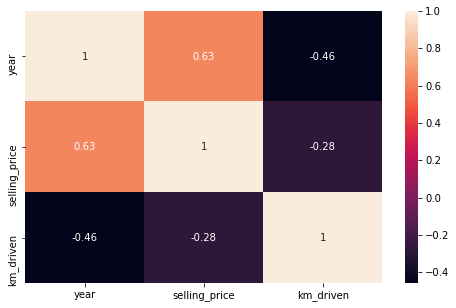

In [64]:
plt.figure(figsize=(8,5))
sns.heatmap(data.corr(),annot=True)

Here we have only 2 feature in dataset aprt from target which are numeric and its clearly shown in above map that these feature shave clear relationship with target-price

### Encoding Features

In our dataset we have 6 features which are object data type so we need to encode all these features.

In [ ]:
#remove whitespace-lets remove white space from dataset if any.
data.reset_index(inplace=True)

In [74]:
data=data.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

In [77]:
data=data.drop(columns=['level_0','index'])

In [83]:
for col in data.columns:
    if data[col].dtypes=='object':
        print(col)
        

fuel
seller_type
transmission
owner
Brand
variant


In [88]:
data['transmission'].unique()

data['transmission']=data['transmission'].replace(['Manual', 'Automatic'],[1,0])

In [93]:
data=pd.get_dummies(data,columns=['fuel','seller_type','owner','Brand','variant'])

In [94]:
data.shape

(3287, 1395)

In [95]:
for col in data.columns:
    if data[col].dtypes=='object':
        print(col)    

Data is all clean now & ready for model building

### Split Features

In [97]:
X=data.drop(columns=['selling_price'])
y=data.selling_price  

### Feature Scaling

In [99]:
scale=StandardScaler()
x_scaled=scale.fit_transform(X)

### Train Test Split

In [100]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=91)

### Model Building

In [115]:
lr=LinearRegression()
rfr=RandomForestRegressor()
ada=AdaBoostRegressor()

In [116]:
lr.fit(x_train,y_train)
rfr.fit(x_train,y_train)
ada.fit(x_train,y_train)

AdaBoostRegressor()

In [117]:
print('Linear Regression training score: ',lr.score(x_train,y_train))
print('Random Forest training score: ',rfr.score(x_train,y_train))
print('AdaBoostRegressor training score: ',ada.score(x_train,y_train))

Linear Regression training score:  0.8245268559432609
Random Forest training score:  0.9594786465395186
AdaBoostRegressor training score:  0.4732693878036033


### Model Evaluation

In [105]:
#lr score

y_pred=lr.predict(x_test)
print(r2_score(y_test,y_pred)*100)

-5.080035726394433e+30


In [118]:
#rfr score

y_pred=rfr.predict(x_test)
print(r2_score(y_test,y_pred)*100)

71.61506419295574


In [107]:
#ada score

y_pred=ada.predict(x_test)
print(r2_score(y_test,y_pred)*100)

48.337744298574506


We tried 3 algorithms and found that random forest training & test score is best amongs all.

### Cross Validation

In [108]:
from sklearn.model_selection import cross_val_score

In [119]:
print('Linear Regression score:',np.mean(cross_val_score(lr,x_scaled,y))*100)

print('Random Forest score:',np.mean(cross_val_score(rfr,x_scaled,y))*100)

print('ADA score:',np.mean(cross_val_score(ada,x_scaled,y))*100)

Linear Regression score: -4.409499481428228e+30
Random Forest score: 69.75109310618683
ADA score: 49.052602606743214


In [ ]:
Cross validation score also highest for Random forest regressor , so we will go with this algorithm

#### Hyperparameter Tunning

Here i am skipping this step because we dataset have too many features and in local machine its going take hours together.

### Select Best Model

We have check earlier with training score 96% , test score-71% and cross validation score 70% Random Forest regressor is our best model so we will go with it.

### Final Score

In [120]:
y_pred=rfr.predict(x_test)

print('CV score of Random Forest score:',np.mean(cross_val_score(rfr,x_scaled,y))*100)
print('R2_Score: ',r2_score(y_test,y_pred)*100)
print('Mean Square Error: ',mean_squared_error(y_test,y_pred))
print('Mean Absolute Error: ',mean_absolute_error(y_test,y_pred))

CV score of Random Forest score: 69.84343038728274
R2_Score:  71.61506419295574
Mean Square Error:  17774815251.404476
Mean Absolute Error:  88522.1892526455


### Model Save

In [121]:
filename='car_price.pickle'
pickle.dump(rfr,open(filename,'wb'))